In [33]:
import re
import numpy as np
from sklearn.datasets import load_files
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [12]:
dataframe=load_files('../data/BuzzFeed/')
x,y=dataframe.data,dataframe.target

In [3]:
with open('fake_real.pickle','wb')as f:
    pickle.dump(x,f)
with open('output.pickle','wb')as f:
    pickle.dump(y,f)
with open('fake_real.pickle','rb')as f:
    x=pickle.load(f)
with open('output.pickle','rb')as f:
    y=pickle.load(f)
        

In [50]:
corpous=[]
for i in range(len(x)):
    text=str(x[i])
    text=re.sub(r'\W',' ',text.lower())
    text=re.sub(r'^[a-z]\s+',' ',text)
    text=re.sub(r'\s+[a-z]\s+',' ',text)
    text=re.sub(r'\s+',' ',text)
    corpous.append(text)


In [5]:
tfidf=TfidfVectorizer(max_features=6500,min_df=2,max_df=0.6,stop_words=stopwords.words('english'))
x=tfidf.fit_transform(corpous).toarray()

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Logistic regression

In [7]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
predicted=lr.predict(x_test)

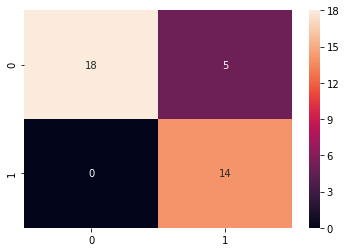

In [36]:
cf=confusion_matrix(predicted,y_test)
sb.heatmap(cf,annot=True)

In [15]:
cf

array([[18,  5],
       [ 0, 14]], dtype=int64)

In [22]:
32/37*100

86.48648648648648

In [17]:
len(y_test)

37

# Support Vector Machine

In [25]:
svm=SVC(kernel='linear',C=10)
svm.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
svm_pred=svm.predict(x_test)


In [29]:
df=confusion_matrix(svm_pred,y_test)
df

array([[18,  3],
       [ 0, 16]], dtype=int64)

In [31]:
34/37*100

91.8918918918919